In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pip install pandas numpy seaborn matplotlib keras tensorflow 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
train_df = pd.read_csv('UNSW_NB15_train-set.csv').drop(['id'], axis=1)
test_df = pd.read_csv('UNSW_NB15_test-set.csv').drop(['id'], axis=1)

In [4]:
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
pip install scikit-learn


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix

In [7]:
# separate categroicals with non categoricals 
output1 = train_df[['attack_cat']].copy()  # multiclass
output2 = train_df[['label']].copy()       # binary

input_categroicals = train_df.dtypes[train_df.dtypes == object].index.tolist()[:-1]
input_numericals = train_df.dtypes[train_df.dtypes != object].index.tolist()[:-1]

input_categorical_values = train_df[input_categroicals].copy()
input_numerical_values = train_df[input_numericals].copy()

In [8]:
test_input_categorical_values = test_df[input_categroicals].copy()
test_input_numerical_values = test_df[input_numericals].copy()

In [9]:
# encoding the values
output1 = pd.get_dummies(output1)

rbs= RobustScaler()
rbs.fit(input_numerical_values)
input_numerical_values = pd.DataFrame(rbs.transform(input_numerical_values), columns=input_numericals)
input_numerical_values

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.179469,0.4,0.2,-0.131902,0.007260,-0.025220,-0.010417,0.892857,-0.009738,0.253129,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,0.0
1,0.970450,1.2,3.6,0.233129,37.976407,-0.025185,-1.000000,0.884921,-0.009803,18.032918,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,0.2,0.0
2,2.427244,0.6,1.4,-0.050613,11.816697,-0.025700,-1.000000,0.884921,-0.009880,2.136200,...,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,-0.142857,0.2,0.0
3,2.514830,1.0,1.0,0.151840,0.549909,-0.025704,-1.000000,0.884921,-0.009867,0.068652,...,0.000000,0.00,0.0,0.000000,1.0,1.0,0.0,-0.142857,-0.3,0.0
4,0.670406,0.8,0.4,0.079755,0.094374,-0.025546,0.000000,0.884921,-0.009801,0.091221,...,0.000000,0.25,0.0,3.363636,0.0,0.0,0.0,-0.142857,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-0.002355,0.0,-0.2,-0.242331,-0.148820,0.863309,0.000000,-0.115079,0.560186,-0.051967,...,3.666667,5.75,6.0,1.909091,0.0,0.0,0.0,3.000000,2.0,0.0
175337,0.754692,0.8,0.6,0.145706,0.172414,-0.025544,0.000000,0.884921,-0.009798,0.124133,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.3,0.0
175338,-0.002355,0.0,-0.2,-0.242331,-0.148820,0.863309,0.000000,-0.115079,0.560186,-0.051967,...,0.166667,0.50,1.0,0.909091,0.0,0.0,0.0,0.000000,0.8,0.0
175339,-0.002355,0.0,-0.2,-0.242331,-0.148820,0.863309,0.000000,-0.115079,0.560186,-0.051967,...,4.666667,7.25,6.5,2.454545,0.0,0.0,0.0,3.857143,2.6,0.0


In [10]:
test_output1 = test_df[['attack_cat']].copy()  # multiclass
# test_output1 = pd.get_dummies(test_output1)

test_output2 = test_df[['label']].copy()       # binary

test_input_numerical_values = pd.DataFrame(rbs.transform(test_input_numerical_values), columns=input_numericals)
test_input_numerical_values

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.002352,0.0,-0.2,0.050613,-0.148820,0.701650,0.000000,-0.115079,2.019491,-0.051967,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.2,0.0
1,-0.002356,0.0,-0.2,1.021472,-0.148820,0.974449,0.000000,-0.115079,9.902808,-0.051967,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.2,0.0
2,-0.002361,0.0,-0.2,0.489264,-0.148820,1.574607,0.000000,-0.115079,9.603514,-0.051967,...,-0.166667,0.00,0.0,0.000000,0.0,0.0,0.0,-0.285714,-0.1,0.0
3,-0.002359,0.0,-0.2,0.360429,-0.148820,1.307870,0.000000,-0.115079,6.741094,-0.051967,...,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,-0.142857,-0.1,0.0
4,-0.002353,0.0,-0.2,1.300613,-0.148820,0.774397,0.000000,-0.115079,9.558507,-0.051967,...,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,-0.142857,-0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,-0.002361,0.0,-0.2,-0.250000,-0.148820,1.574607,0.000000,-0.115079,0.926240,-0.051967,...,0.000000,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.142857,-0.3,0.0
82328,1.653321,1.8,0.6,13.521472,0.172414,-0.025618,0.000000,0.884921,-0.008501,0.028554,...,0.000000,0.00,0.0,-0.181818,0.0,0.0,0.0,0.000000,-0.2,0.0
82329,-0.002368,-0.1,-0.2,-0.294479,-0.148820,-0.025813,-1.322917,-0.115079,-0.009898,-0.051967,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,1.0
82330,-0.002368,-0.1,-0.2,-0.294479,-0.148820,-0.025813,-1.322917,-0.115079,-0.009898,-0.051967,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,1.0


In [11]:
(train_df['attack_cat'].value_counts() / train_df.shape[0]).round(4) * 100

Normal            31.94
Generic           22.81
Exploits          19.04
Fuzzers           10.37
DoS                6.99
Reconnaissance     5.98
Analysis           1.14
Backdoor           1.00
Shellcode          0.65
Worms              0.07
Name: attack_cat, dtype: float64

In [12]:
(test_df['attack_cat'].value_counts() / test_df.shape[0]).round(4) * 100

Normal            44.94
Generic           22.92
Exploits          13.52
Fuzzers            7.36
DoS                4.97
Reconnaissance     4.25
Analysis           0.82
Backdoor           0.71
Shellcode          0.46
Worms              0.05
Name: attack_cat, dtype: float64

In [13]:
output1

,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
175336,0,0,0,0,0,1,0,0,0,0
175337,0,0,0,0,0,0,0,0,1,0
175338,0,0,0,0,0,1,0,0,0,0
175339,0,0,0,0,0,1,0,0,0,0


In [14]:
model = Sequential()
model.add(Dense(39, input_dim=39, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 39)                1560      
                                                                 
 dense_1 (Dense)             (None, 10)                400       
                                                                 
Total params: 1,960
Trainable params: 1,960
Non-trainable params: 0
_________________________________________________________________


In [15]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 7s 1ms/step - loss: 47.8696 - accuracy: 0.7065
Epoch 2/10
5480/5480 [==============================] - 7s 1ms/step - loss: 42.4586 - accuracy: 0.7506
Epoch 3/10
5480/5480 [==============================] - 9s 2ms/step - loss: 34.4572 - accuracy: 0.7608
Epoch 4/10
5480/5480 [==============================] - 7s 1ms/step - loss: 24.2206 - accuracy: 0.7660
Epoch 5/10
5480/5480 [==============================] - 7s 1ms/step - loss: 24.0625 - accuracy: 0.7715
Epoch 6/10
5480/5480 [==============================] - 7s 1ms/step - loss: 17.3947 - accuracy: 0.7737
Epoch 7/10
5480/5480 [==============================] - 7s 1ms/step - loss: 11.3202 - accuracy: 0.7776
Epoch 8/10
5480/5480 [==============================] - 7s 1ms/step - loss: 9.0278 - accuracy: 0.7801
Epoch 9/10
5480/5480 [==============================] - 8s 1ms/step - loss: 5.1508 - accuracy: 0.7829
Epoch 10/10
5480/5480 [==============================] - 7s 1ms/step - loss

In [16]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')

2573/2573 [==============================] - 2s 910us/step


In [17]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

0.7113273089442744
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.20      0.02      0.04       583
           DoS       0.51      0.01      0.02      4089
      Exploits       0.52      0.87      0.65     11132
       Fuzzers       0.24      0.53      0.33      6062
       Generic       0.99      0.80      0.89     18871
        Normal       0.92      0.75      0.83     37000
Reconnaissance       0.66      0.79      0.72      3496
     Shellcode       0.44      0.20      0.28       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.71     82332
     macro avg       0.45      0.40      0.37     82332
  weighted avg       0.79      0.71      0.72     82332



<AxesSubplot: >

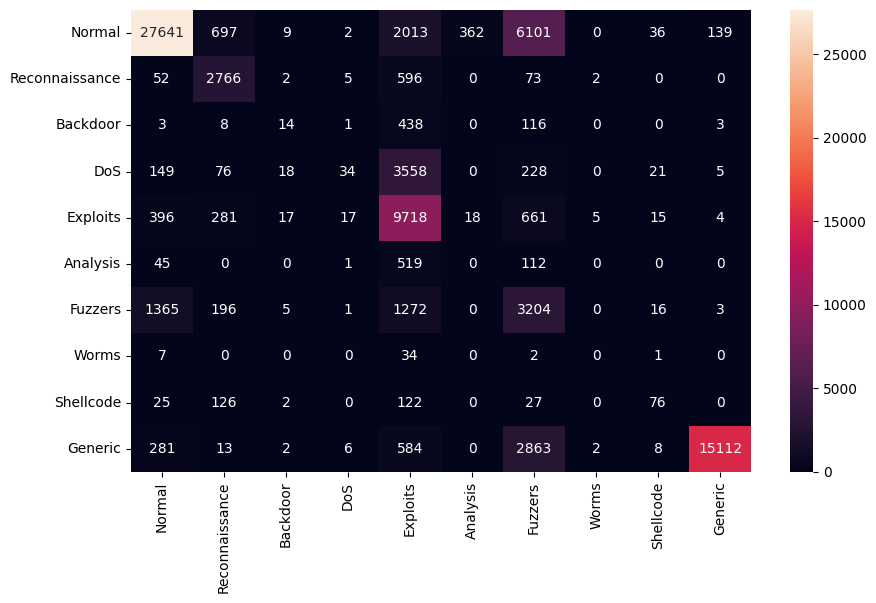

In [18]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [19]:
model = Sequential()
model.add(Dense(26, input_dim=39, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 10)                270       
                                                                 
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
_________________________________________________________________


In [20]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 7s 1ms/step - loss: 45.4391 - accuracy: 0.6981
Epoch 2/10
5480/5480 [==============================] - 7s 1ms/step - loss: 33.5713 - accuracy: 0.7474
Epoch 3/10
5480/5480 [==============================] - 6s 1ms/step - loss: 32.0505 - accuracy: 0.7582
Epoch 4/10
5480/5480 [==============================] - 6s 1ms/step - loss: 24.1034 - accuracy: 0.7632
Epoch 5/10
5480/5480 [==============================] - 6s 1ms/step - loss: 21.4234 - accuracy: 0.7686
Epoch 6/10
5480/5480 [==============================] - 6s 1ms/step - loss: 13.5485 - accuracy: 0.7709
Epoch 7/10
5480/5480 [==============================] - 6s 1ms/step - loss: 13.3426 - accuracy: 0.7730
Epoch 8/10
5480/5480 [==============================] - 6s 1ms/step - loss: 10.8983 - accuracy: 0.7762
Epoch 9/10
5480/5480 [==============================] - 6s 1ms/step - loss: 4.8412 - accuracy: 0.7766
Epoch 10/10
5480/5480 [==============================] - 6s 1ms/step - los

In [21]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 2s 932us/step
0.7045741631443424


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.00      0.00      0.00       583
           DoS       0.22      0.06      0.10      4089
      Exploits       0.53      0.81      0.64     11132
       Fuzzers       0.23      0.48      0.31      6062
       Generic       0.99      0.88      0.93     18871
        Normal       0.90      0.71      0.79     37000
Reconnaissance       0.59      0.80      0.68      3496
     Shellcode       0.24      0.47      0.32       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.70     82332
     macro avg       0.37      0.42      0.38     82332
  weighted avg       0.76      0.70      0.72     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

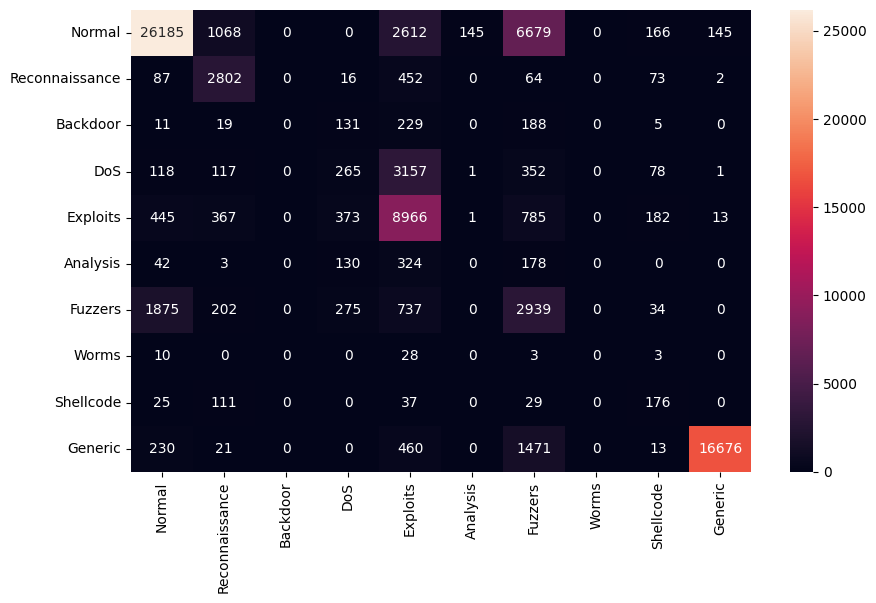

In [22]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [23]:
model = Sequential()
model.add(Dense(39, input_dim=39, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 39)                1560      
                                                                 
 dense_5 (Dense)             (None, 26)                1040      
                                                                 
 dense_6 (Dense)             (None, 10)                270       
                                                                 
Total params: 2,870
Trainable params: 2,870
Non-trainable params: 0
_________________________________________________________________


In [24]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 7s 1ms/step - loss: 18.9787 - accuracy: 0.7147
Epoch 2/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.6679 - accuracy: 0.7595
Epoch 3/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.6029 - accuracy: 0.7684
Epoch 4/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.5714 - accuracy: 0.7732
Epoch 5/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.5552 - accuracy: 0.7767
Epoch 6/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.5466 - accuracy: 0.7792
Epoch 7/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5464 - accuracy: 0.7807
Epoch 8/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.5579 - accuracy: 0.7821
Epoch 9/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.5299 - accuracy: 0.7834
Epoch 10/10
5480/5480 [==============================] - 6s 1ms/step - loss: 0.53

In [25]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 954us/step
0.7038332604576593


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.19      0.03      0.05       583
           DoS       0.55      0.03      0.05      4089
      Exploits       0.52      0.88      0.65     11132
       Fuzzers       0.23      0.55      0.32      6062
       Generic       1.00      0.79      0.88     18871
        Normal       0.93      0.72      0.81     37000
Reconnaissance       0.69      0.81      0.75      3496
     Shellcode       0.30      0.42      0.35       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.70     82332
     macro avg       0.44      0.42      0.39     82332
  weighted avg       0.79      0.70      0.72     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

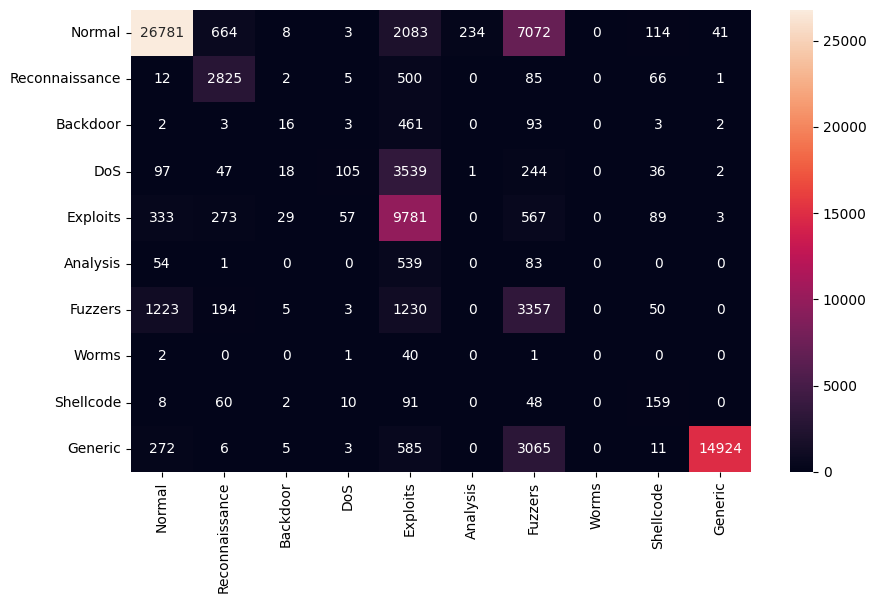

In [26]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [27]:
model = Sequential()
model.add(Dense(39, input_dim=39, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 39)                1560      
                                                                 
 dense_8 (Dense)             (None, 26)                1040      
                                                                 
 dense_9 (Dense)             (None, 17)                459       
                                                                 
 dense_10 (Dense)            (None, 10)                180       
                                                                 
Total params: 3,239
Trainable params: 3,239
Non-trainable params: 0
_________________________________________________________________


In [28]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 9s 1ms/step - loss: 5.8227 - accuracy: 0.7140
Epoch 2/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.6278 - accuracy: 0.7604
Epoch 3/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5991 - accuracy: 0.7675
Epoch 4/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5832 - accuracy: 0.7709
Epoch 5/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5577 - accuracy: 0.7757
Epoch 6/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5465 - accuracy: 0.7783
Epoch 7/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5442 - accuracy: 0.7796
Epoch 8/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5365 - accuracy: 0.7812
Epoch 9/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5296 - accuracy: 0.7828
Epoch 10/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.552

In [29]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 976us/step
0.7163678764028567


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.23      0.02      0.03       583
           DoS       0.74      0.01      0.02      4089
      Exploits       0.52      0.87      0.65     11132
       Fuzzers       0.25      0.61      0.35      6062
       Generic       1.00      0.86      0.92     18871
        Normal       0.93      0.71      0.81     37000
Reconnaissance       0.75      0.81      0.78      3496
     Shellcode       0.36      0.50      0.42       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.72     82332
     macro avg       0.48      0.44      0.40     82332
  weighted avg       0.81      0.72      0.72     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

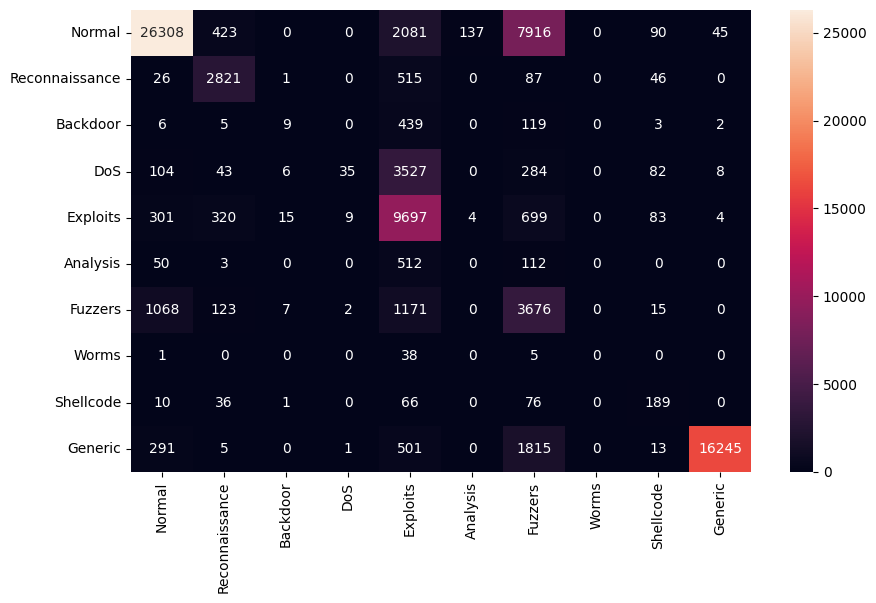

In [30]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [31]:
model = Sequential()
model.add(Dense(39, input_dim=39, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 39)                1560      
                                                                 
 dense_12 (Dense)            (None, 17)                680       
                                                                 
 dense_13 (Dense)            (None, 11)                198       
                                                                 
 dense_14 (Dense)            (None, 10)                120       
                                                                 
Total params: 2,558
Trainable params: 2,558
Non-trainable params: 0
_________________________________________________________________


In [32]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 8s 1ms/step - loss: 1.6720 - accuracy: 0.7104
Epoch 2/10
5480/5480 [==============================] - 8s 2ms/step - loss: 0.6267 - accuracy: 0.7608
Epoch 3/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.6051 - accuracy: 0.7661
Epoch 4/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5828 - accuracy: 0.7682
Epoch 5/10
5480/5480 [==============================] - 8s 2ms/step - loss: 0.5740 - accuracy: 0.7729
Epoch 6/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5616 - accuracy: 0.7749
Epoch 7/10
5480/5480 [==============================] - 8s 2ms/step - loss: 0.5559 - accuracy: 0.7776
Epoch 8/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5516 - accuracy: 0.7776
Epoch 9/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5490 - accuracy: 0.7790
Epoch 10/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.543

In [33]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.6708691638730991


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.17      0.00      0.00       583
           DoS       0.24      0.05      0.08      4089
      Exploits       0.48      0.89      0.62     11132
       Fuzzers       0.21      0.57      0.31      6062
       Generic       0.99      0.82      0.90     18871
        Normal       0.94      0.63      0.75     37000
Reconnaissance       0.78      0.76      0.77      3496
     Shellcode       0.44      0.26      0.33       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.67     82332
     macro avg       0.42      0.40      0.38     82332
  weighted avg       0.78      0.67      0.69     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

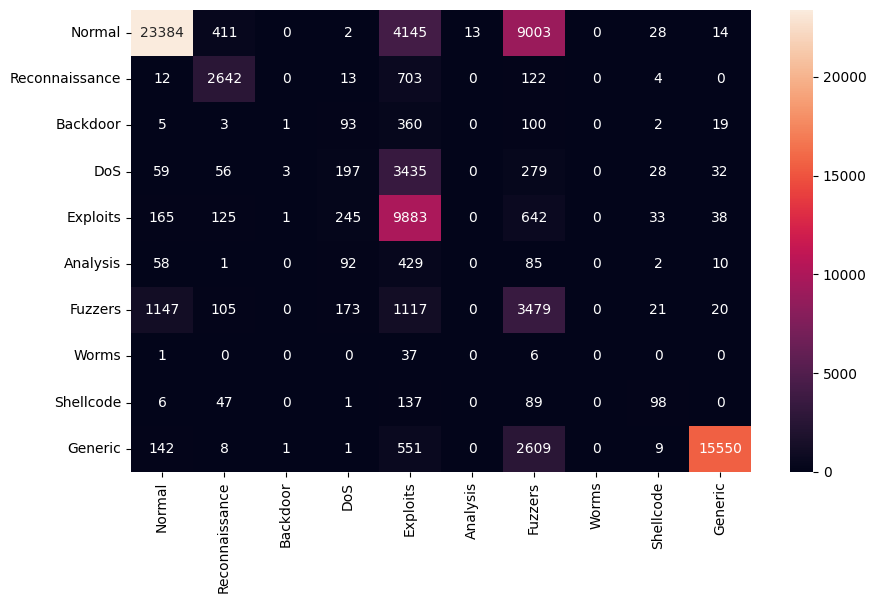

In [34]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [35]:
model = Sequential()
model.add(Dense(39, input_dim=39, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 39)                1560      
                                                                 
 dense_16 (Dense)            (None, 11)                440       
                                                                 
 dense_17 (Dense)            (None, 7)                 84        
                                                                 
 dense_18 (Dense)            (None, 10)                80        
                                                                 
Total params: 2,164
Trainable params: 2,164
Non-trainable params: 0
_________________________________________________________________


In [36]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 9s 2ms/step - loss: 2.2320 - accuracy: 0.6689
Epoch 2/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.6615 - accuracy: 0.7524
Epoch 3/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.6442 - accuracy: 0.7593
Epoch 4/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5996 - accuracy: 0.7670
Epoch 5/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5817 - accuracy: 0.7705
Epoch 6/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5819 - accuracy: 0.7744
Epoch 7/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5632 - accuracy: 0.7777
Epoch 8/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5636 - accuracy: 0.7765
Epoch 9/10
5480/5480 [==============================] - 8s 2ms/step - loss: 0.5540 - accuracy: 0.7783
Epoch 10/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.554

In [37]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.7113516008356411


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.00      0.00      0.00       583
           DoS       1.00      0.00      0.00      4089
      Exploits       0.50      0.91      0.65     11132
       Fuzzers       0.25      0.56      0.34      6062
       Generic       0.99      0.88      0.93     18871
        Normal       0.94      0.69      0.80     37000
Reconnaissance       0.71      0.79      0.75      3496
     Shellcode       0.32      0.45      0.38       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.71     82332
     macro avg       0.47      0.43      0.38     82332
  weighted avg       0.82      0.71      0.72     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

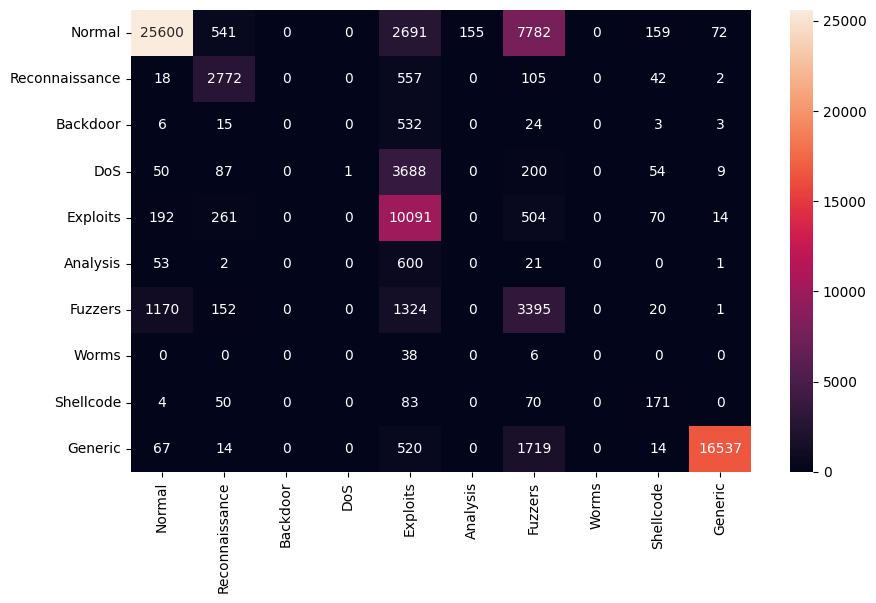

In [38]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [39]:
model = Sequential()
model.add(Dense(17, input_dim=39, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 17)                680       
                                                                 
 dense_20 (Dense)            (None, 11)                198       
                                                                 
 dense_21 (Dense)            (None, 7)                 84        
                                                                 
 dense_22 (Dense)            (None, 10)                80        
                                                                 
Total params: 1,042
Trainable params: 1,042
Non-trainable params: 0
_________________________________________________________________


In [40]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 8s 1ms/step - loss: 7.3038 - accuracy: 0.6209
Epoch 2/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.7653 - accuracy: 0.7232
Epoch 3/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.6707 - accuracy: 0.7523
Epoch 4/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.6369 - accuracy: 0.7571
Epoch 5/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.6331 - accuracy: 0.7593
Epoch 6/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.6165 - accuracy: 0.7605
Epoch 7/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.6029 - accuracy: 0.7625
Epoch 8/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.5961 - accuracy: 0.7634
Epoch 9/10
5480/5480 [==============================] - 7s 1ms/step - loss: 0.5907 - accuracy: 0.7653
Epoch 10/10
5480/5480 [==============================] - 8s 1ms/step - loss: 0.584

In [41]:
test_output_numerical_values = model.predict(test_input_numerical_values)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.6851285041053297


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.00      0.00      0.00       583
           DoS       0.21      0.18      0.20      4089
      Exploits       0.50      0.80      0.62     11132
       Fuzzers       0.24      0.58      0.34      6062
       Generic       0.99      0.90      0.94     18871
        Normal       0.93      0.64      0.76     37000
Reconnaissance       0.70      0.74      0.72      3496
     Shellcode       0.37      0.15      0.21       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.69     82332
     macro avg       0.39      0.40      0.38     82332
  weighted avg       0.77      0.69      0.71     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

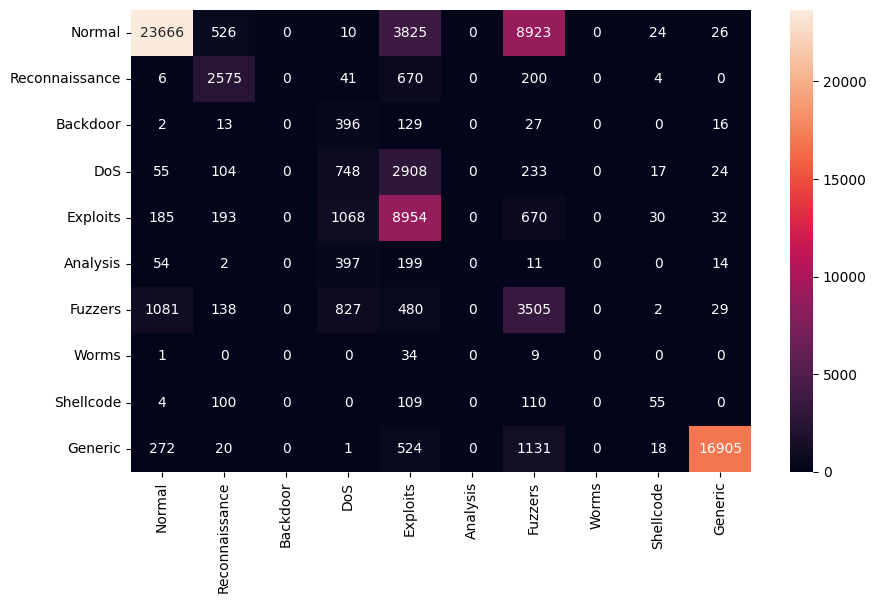

In [42]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

data = input_numerical_values.values
data = data.reshape(input_numerical_values.shape[0], 1, 39, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 3), activation='relu', input_shape=(1, 39, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 37, 32)         128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 18, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               73856     
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,274
Trainable params: 75,274
Non-trainable params: 0
__________________________________________________

In [44]:
model.fit(data, output1, epochs=10, batch_size=32)

Epoch 1/10
5480/5480 [==============================] - 13s 2ms/step - loss: 46.4315 - accuracy: 0.7347
Epoch 2/10
5480/5480 [==============================] - 12s 2ms/step - loss: 1.5144 - accuracy: 0.7765
Epoch 3/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5659 - accuracy: 0.7857
Epoch 4/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5607 - accuracy: 0.7927
Epoch 5/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5353 - accuracy: 0.7965
Epoch 6/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5317 - accuracy: 0.8001
Epoch 7/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5074 - accuracy: 0.8013
Epoch 8/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5199 - accuracy: 0.8032
Epoch 9/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5417 - accuracy: 0.8051
Epoch 10/10
5480/5480 [==============================] - 12s 2ms/step - 

In [45]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.730068503133654
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.35      0.03      0.06       583
           DoS       0.31      0.02      0.03      4089
      Exploits       0.53      0.94      0.68     11132
       Fuzzers       0.28      0.70      0.40      6062
       Generic       1.00      0.93      0.96     18871
        Normal       0.98      0.68      0.80     37000
Reconnaissance       0.86      0.76      0.81      3496
     Shellcode       0.29      0.41      0.34       378
         Worms       0.62      0.11      0.19        44

      accuracy                           0.73     82332
     macro avg       0.52      0.46      0.43     82332
  weighted avg       0.82      0.73      0.74     82332



<AxesSubplot: >

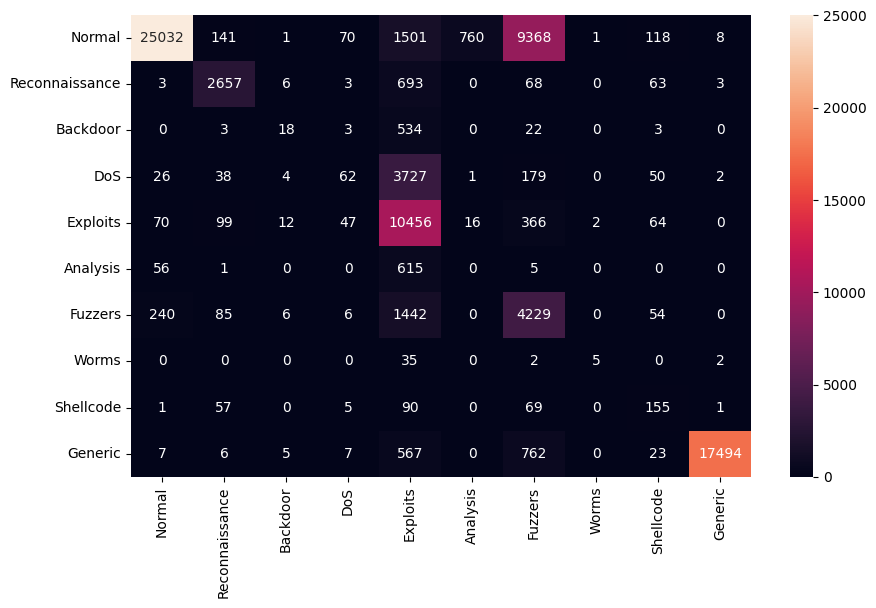

In [46]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [47]:
model = Sequential()
model.add(Conv2D(17, kernel_size=(1, 3), activation='relu', input_shape=(1, 39, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1, 37, 17)         68        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 18, 17)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 306)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                19648     
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 20,366
Trainable params: 20,366
Non-trainable params: 0
__________________________________________________

In [48]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 12s 2ms/step - loss: 50.0619 - accuracy: 0.7343
Epoch 2/10
5480/5480 [==============================] - 12s 2ms/step - loss: 10.7945 - accuracy: 0.7712
Epoch 3/10
5480/5480 [==============================] - 10s 2ms/step - loss: 2.2373 - accuracy: 0.7830
Epoch 4/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.6033 - accuracy: 0.7896
Epoch 5/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.5385 - accuracy: 0.7934
Epoch 6/10
5480/5480 [==============================] - 11s 2ms/step - loss: 0.5573 - accuracy: 0.7963
Epoch 7/10
5480/5480 [==============================] - 12s 2ms/step - loss: 0.5145 - accuracy: 0.7983
Epoch 8/10
5480/5480 [==============================] - 11s 2ms/step - loss: 0.5089 - accuracy: 0.8002
Epoch 9/10
5480/5480 [==============================] - 11s 2ms/step - loss: 0.5090 - accuracy: 0.8013
Epoch 10/10
5480/5480 [==============================] - 11s 2ms/step -

In [49]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.6978453092357771
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.23      0.02      0.04       583
           DoS       0.35      0.03      0.05      4089
      Exploits       0.56      0.87      0.68     11132
       Fuzzers       0.23      0.66      0.34      6062
       Generic       1.00      0.90      0.95     18871
        Normal       0.98      0.64      0.77     37000
Reconnaissance       0.68      0.82      0.74      3496
     Shellcode       0.18      0.48      0.27       378
         Worms       0.43      0.07      0.12        44

      accuracy                           0.70     82332
     macro avg       0.46      0.45      0.40     82332
  weighted avg       0.81      0.70      0.72     82332



<AxesSubplot: >

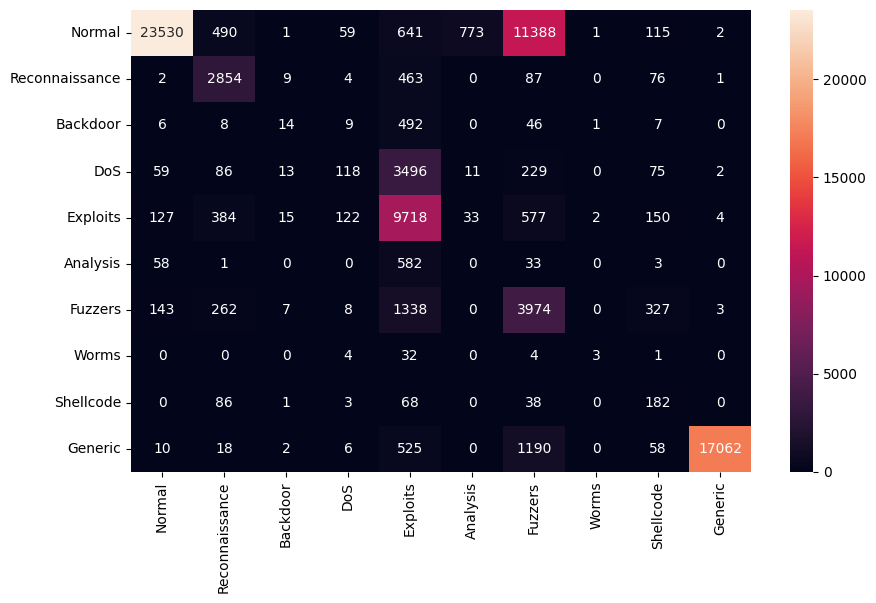

In [50]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [51]:
model = Sequential()
model.add(Conv2D(42, kernel_size=(1, 3), activation='relu', input_shape=(1, 39, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1, 37, 42)         168       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 18, 42)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 756)               0         
                                                                 
 dense_27 (Dense)            (None, 150)               113550    
                                                                 
 dense_28 (Dense)            (None, 10)                1510      
                                                                 
Total params: 115,228
Trainable params: 115,228
Non-trainable params: 0
________________________________________________

In [52]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 15s 3ms/step - loss: 43.7260 - accuracy: 0.7501
Epoch 2/10
5480/5480 [==============================] - 17s 3ms/step - loss: 0.6333 - accuracy: 0.7858
Epoch 3/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.5416 - accuracy: 0.7950
Epoch 4/10
5480/5480 [==============================] - 15s 3ms/step - loss: 0.5778 - accuracy: 0.7988
Epoch 5/10
5480/5480 [==============================] - 15s 3ms/step - loss: 0.5192 - accuracy: 0.8021
Epoch 6/10
5480/5480 [==============================] - 15s 3ms/step - loss: 0.5072 - accuracy: 0.8036
Epoch 7/10
5480/5480 [==============================] - 16s 3ms/step - loss: 0.5088 - accuracy: 0.8053
Epoch 8/10
5480/5480 [==============================] - 16s 3ms/step - loss: 0.4998 - accuracy: 0.8069
Epoch 9/10
5480/5480 [==============================] - 17s 3ms/step - loss: 0.5396 - accuracy: 0.8076
Epoch 10/10
5480/5480 [==============================] - 17s 3ms/step - 

In [53]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.7514696594276831
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.46      0.03      0.05       583
           DoS       0.29      0.04      0.07      4089
      Exploits       0.53      0.92      0.67     11132
       Fuzzers       0.28      0.53      0.37      6062
       Generic       1.00      0.95      0.97     18871
        Normal       0.97      0.74      0.84     37000
Reconnaissance       0.79      0.79      0.79      3496
     Shellcode       0.19      0.58      0.28       378
         Worms       0.67      0.14      0.23        44

      accuracy                           0.75     82332
     macro avg       0.52      0.47      0.43     82332
  weighted avg       0.81      0.75      0.76     82332



<AxesSubplot: >

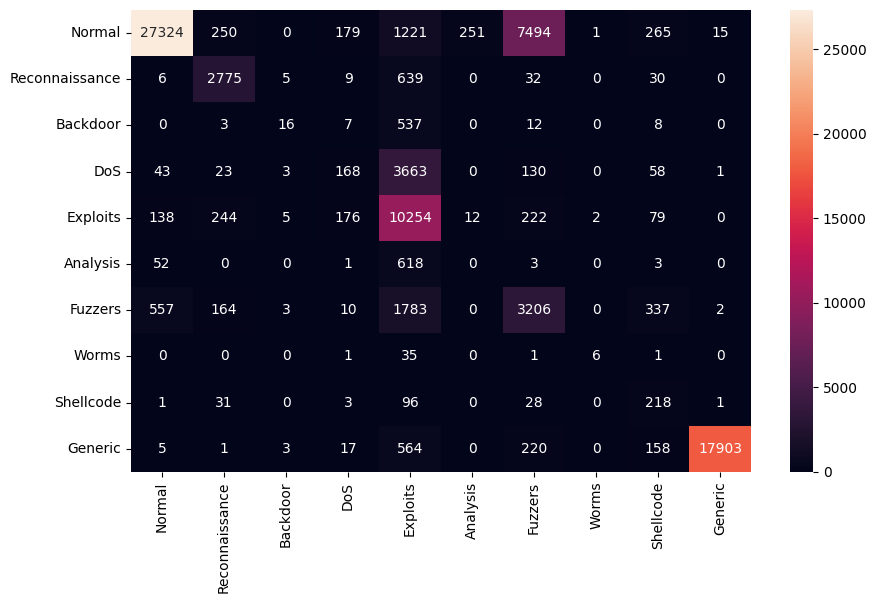

In [54]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [55]:
model = Sequential()
model.add(Conv2D(42, kernel_size=(1, 3), activation='relu', input_shape=(1, 39, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 1, 37, 42)         168       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 18, 42)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 756)               0         
                                                                 
 dense_29 (Dense)            (None, 150)               113550    
                                                                 
 dense_30 (Dense)            (None, 15)                2265      
                                                                 
 dense_31 (Dense)            (None, 10)                160       
                                                     

In [56]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 15s 3ms/step - loss: 0.7750 - accuracy: 0.7387
Epoch 2/10
5480/5480 [==============================] - 15s 3ms/step - loss: 0.5930 - accuracy: 0.7658
Epoch 3/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.6238 - accuracy: 0.7741
Epoch 4/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.5488 - accuracy: 0.7781
Epoch 5/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.5360 - accuracy: 0.7815
Epoch 6/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.5286 - accuracy: 0.7839
Epoch 7/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.5275 - accuracy: 0.7852
Epoch 8/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.5169 - accuracy: 0.7867
Epoch 9/10
5480/5480 [==============================] - 14s 3ms/step - loss: 0.5122 - accuracy: 0.7880
Epoch 10/10
5480/5480 [==============================] - 15s 3ms/step - l

In [57]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.7542267890977992


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.24      0.02      0.04       583
           DoS       0.53      0.02      0.04      4089
      Exploits       0.47      0.92      0.62     11132
       Fuzzers       0.35      0.51      0.42      6062
       Generic       1.00      0.96      0.98     18871
        Normal       0.95      0.74      0.83     37000
Reconnaissance       0.81      0.82      0.81      3496
     Shellcode       0.24      0.51      0.33       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.75     82332
     macro avg       0.46      0.45      0.41     82332
  weighted avg       0.81      0.75      0.75     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

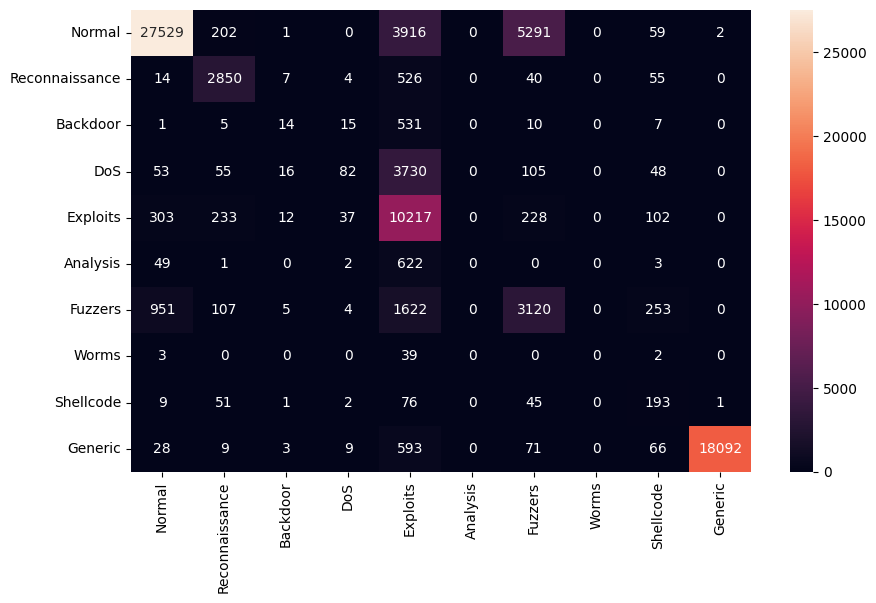

In [58]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [59]:
model = Sequential()
model.add(Conv2D(42, kernel_size=(1, 3), activation='relu', input_shape=(1, 39, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 1, 37, 42)         168       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 18, 42)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 756)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                7570      
                                                                 
Total params: 7,738
Trainable params: 7,738
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 11s 2ms/step - loss: 34.1317 - accuracy: 0.7271
Epoch 2/10
5480/5480 [==============================] - 10s 2ms/step - loss: 12.7038 - accuracy: 0.7598
Epoch 3/10
5480/5480 [==============================] - 12s 2ms/step - loss: 5.6502 - accuracy: 0.7685
Epoch 4/10
5480/5480 [==============================] - 11s 2ms/step - loss: 3.3752 - accuracy: 0.7740
Epoch 5/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.6193 - accuracy: 0.7791
Epoch 6/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.5698 - accuracy: 0.7836
Epoch 7/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.5766 - accuracy: 0.7851
Epoch 8/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.5843 - accuracy: 0.7880
Epoch 9/10
5480/5480 [==============================] - 10s 2ms/step - loss: 0.5478 - accuracy: 0.7884
Epoch 10/10
5480/5480 [==============================] - 10s 2ms/step -

In [61]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 2s 828us/step
0.7388500218627022
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.33      0.00      0.00       583
           DoS       0.70      0.00      0.00      4089
      Exploits       0.53      0.91      0.67     11132
       Fuzzers       0.29      0.55      0.38      6062
       Generic       0.95      0.96      0.96     18871
        Normal       0.97      0.71      0.82     37000
Reconnaissance       0.63      0.78      0.70      3496
     Shellcode       0.29      0.24      0.26       378
         Worms       0.71      0.11      0.20        44

      accuracy                           0.74     82332
     macro avg       0.54      0.43      0.40     82332
  weighted avg       0.81      0.74      0.74     82332



<AxesSubplot: >

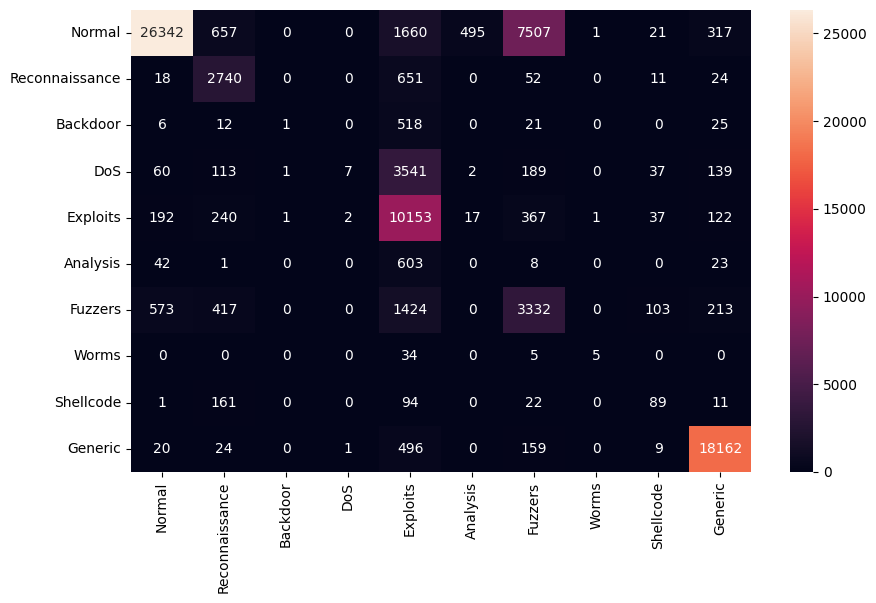

In [62]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [63]:
model = Sequential()
model.add(Conv2D(42, kernel_size=(1, 3), activation='relu', input_shape=(1, 39, 1)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 1, 37, 42)         168       
                                                                 
 flatten_5 (Flatten)         (None, 1554)              0         
                                                                 
 dense_33 (Dense)            (None, 150)               233250    
                                                                 
 dense_34 (Dense)            (None, 10)                1510      
                                                                 
Total params: 234,928
Trainable params: 234,928
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 22s 4ms/step - loss: 29.2197 - accuracy: 0.7633
Epoch 2/10
5480/5480 [==============================] - 21s 4ms/step - loss: 0.5733 - accuracy: 0.7914
Epoch 3/10
5480/5480 [==============================] - 21s 4ms/step - loss: 0.6382 - accuracy: 0.7990
Epoch 4/10
5480/5480 [==============================] - 22s 4ms/step - loss: 0.5705 - accuracy: 0.8016
Epoch 5/10
5480/5480 [==============================] - 22s 4ms/step - loss: 0.5025 - accuracy: 0.8051
Epoch 6/10
5480/5480 [==============================] - 22s 4ms/step - loss: 0.5428 - accuracy: 0.8060
Epoch 7/10
5480/5480 [==============================] - 21s 4ms/step - loss: 0.6090 - accuracy: 0.8078
Epoch 8/10
5480/5480 [==============================] - 22s 4ms/step - loss: 0.4945 - accuracy: 0.8093
Epoch 9/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.5006 - accuracy: 0.8102
Epoch 10/10
5480/5480 [==============================] - 20s 4ms/step - 

In [65]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.7726036049166788
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.51      0.04      0.07       583
           DoS       0.55      0.02      0.04      4089
      Exploits       0.54      0.93      0.68     11132
       Fuzzers       0.32      0.57      0.41      6062
       Generic       1.00      0.93      0.96     18871
        Normal       0.97      0.79      0.87     37000
Reconnaissance       0.81      0.79      0.80      3496
     Shellcode       0.29      0.53      0.37       378
         Worms       0.71      0.11      0.20        44

      accuracy                           0.77     82332
     macro avg       0.57      0.47      0.44     82332
  weighted avg       0.83      0.77      0.77     82332



<AxesSubplot: >

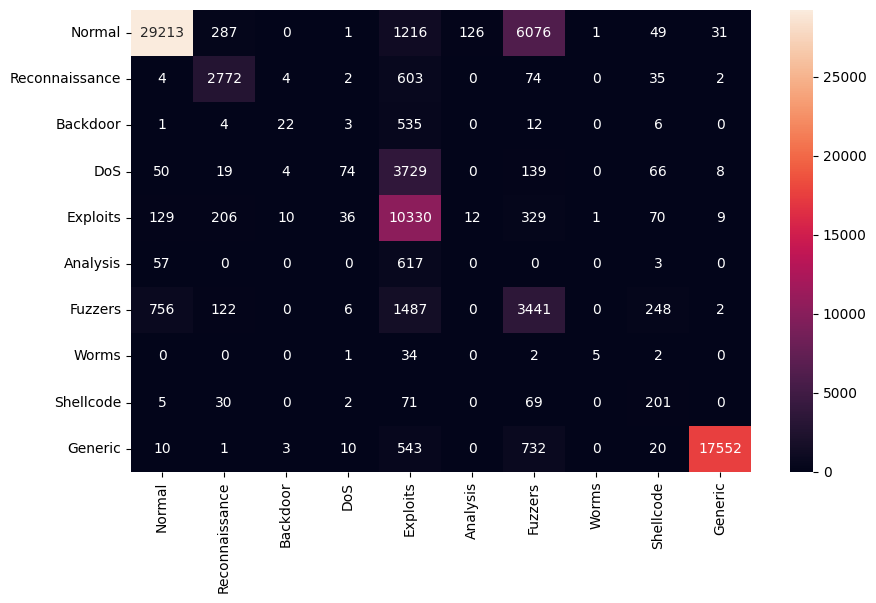

In [66]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [67]:
model = Sequential()
model.add(Conv2D(42, kernel_size=(1, 5), activation='relu', input_shape=(1, 39, 1)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1, 35, 42)         252       
                                                                 
 flatten_6 (Flatten)         (None, 1470)              0         
                                                                 
 dense_35 (Dense)            (None, 150)               220650    
                                                                 
 dense_36 (Dense)            (None, 10)                1510      
                                                                 
Total params: 222,412
Trainable params: 222,412
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 19s 3ms/step - loss: 15.8034 - accuracy: 0.7609
Epoch 2/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.7438 - accuracy: 0.7917
Epoch 3/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.5829 - accuracy: 0.7982
Epoch 4/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.5577 - accuracy: 0.8012
Epoch 5/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.5650 - accuracy: 0.8039
Epoch 6/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.5920 - accuracy: 0.8050
Epoch 7/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.5257 - accuracy: 0.8068
Epoch 8/10
5480/5480 [==============================] - 18s 3ms/step - loss: 1.5399 - accuracy: 0.8058
Epoch 9/10
5480/5480 [==============================] - 18s 3ms/step - loss: 0.8193 - accuracy: 0.8070
Epoch 10/10
5480/5480 [==============================] - 17s 3ms/step - 

In [69]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.6943472768789778
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.36      0.03      0.06       583
           DoS       0.53      0.03      0.06      4089
      Exploits       0.53      0.93      0.68     11132
       Fuzzers       0.20      0.56      0.29      6062
       Generic       1.00      0.79      0.88     18871
        Normal       0.98      0.69      0.81     37000
Reconnaissance       0.78      0.79      0.78      3496
     Shellcode       0.23      0.52      0.32       378
         Worms       0.62      0.11      0.19        44

      accuracy                           0.69     82332
     macro avg       0.52      0.44      0.41     82332
  weighted avg       0.82      0.69      0.72     82332



<AxesSubplot: >

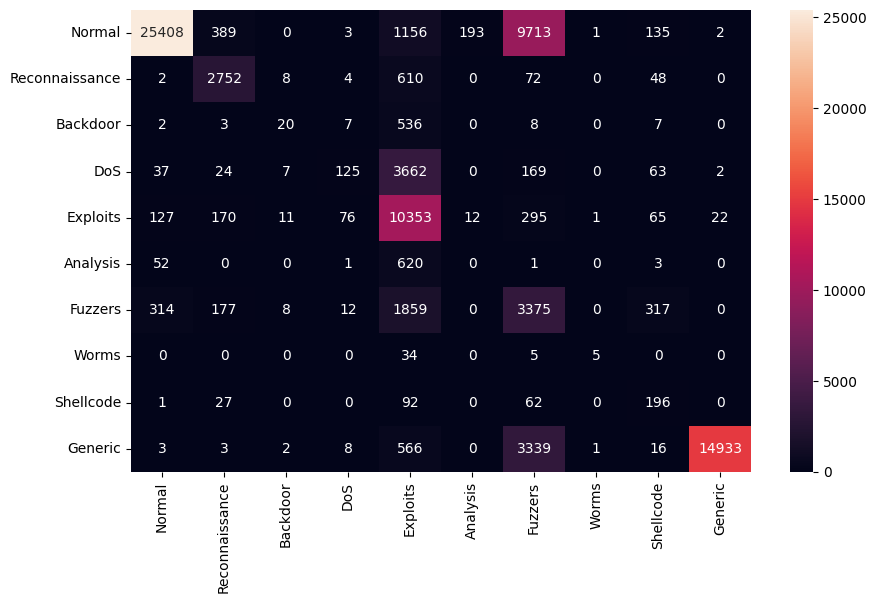

In [70]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [71]:
model = Sequential()
model.add(Conv2D(52, kernel_size=(1, 10), activation='relu', input_shape=(1, 39, 1)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 1, 30, 52)         572       
                                                                 
 flatten_7 (Flatten)         (None, 1560)              0         
                                                                 
 dense_37 (Dense)            (None, 150)               234150    
                                                                 
 dense_38 (Dense)            (None, 10)                1510      
                                                                 
Total params: 236,232
Trainable params: 236,232
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 21s 4ms/step - loss: 6.0313 - accuracy: 0.7520
Epoch 2/10
5480/5480 [==============================] - 21s 4ms/step - loss: 0.5999 - accuracy: 0.7732
Epoch 3/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.6827 - accuracy: 0.7773
Epoch 4/10
5480/5480 [==============================] - 21s 4ms/step - loss: 0.5588 - accuracy: 0.7805
Epoch 5/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.5463 - accuracy: 0.7834
Epoch 6/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.5323 - accuracy: 0.7862
Epoch 7/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.5263 - accuracy: 0.7876
Epoch 8/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.8185 - accuracy: 0.7877
Epoch 9/10
5480/5480 [==============================] - 20s 4ms/step - loss: 0.5340 - accuracy: 0.7894
Epoch 10/10
5480/5480 [==============================] - 20s 4ms/step - l

In [73]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 3s 1ms/step
0.7232910654423553


c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.26      0.05      0.08       583
           DoS       0.40      0.35      0.37      4089
      Exploits       0.49      0.81      0.61     11132
       Fuzzers       0.27      0.46      0.34      6062
       Generic       1.00      0.95      0.97     18871
        Normal       0.95      0.69      0.80     37000
Reconnaissance       0.73      0.79      0.76      3496
     Shellcode       0.18      0.60      0.28       378
         Worms       0.00      0.00      0.00        44

      accuracy                           0.72     82332
     macro avg       0.43      0.47      0.42     82332
  weighted avg       0.80      0.72      0.74     82332



c:\users\gpsmu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

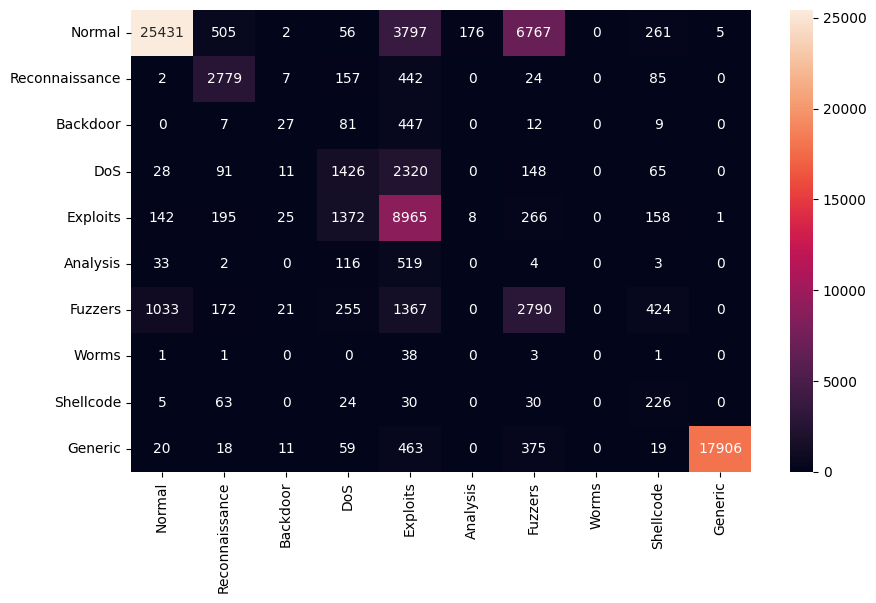

In [74]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [75]:
model = Sequential()
model.add(Conv2D(52, kernel_size=(1, 2), activation='relu', input_shape=(1, 39, 1)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 1, 38, 52)         156       
                                                                 
 flatten_8 (Flatten)         (None, 1976)              0         
                                                                 
 dense_39 (Dense)            (None, 150)               296550    
                                                                 
 dense_40 (Dense)            (None, 10)                1510      
                                                                 
Total params: 298,216
Trainable params: 298,216
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(data, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 30s 5ms/step - loss: 21.6068 - accuracy: 0.7614
Epoch 2/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.5359 - accuracy: 0.7895
Epoch 3/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.5522 - accuracy: 0.7962
Epoch 4/10
5480/5480 [==============================] - 30s 5ms/step - loss: 0.5102 - accuracy: 0.8003
Epoch 5/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.5037 - accuracy: 0.8018
Epoch 6/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.5015 - accuracy: 0.8043
Epoch 7/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.5244 - accuracy: 0.8054
Epoch 8/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.4889 - accuracy: 0.8068
Epoch 9/10
5480/5480 [==============================] - 30s 6ms/step - loss: 0.4980 - accuracy: 0.8073
Epoch 10/10
5480/5480 [==============================] - 30s 5ms/step - 

In [77]:
test_output_numerical_values = model.predict(
    test_input_numerical_values.values.reshape(test_input_numerical_values.shape[0], 1, 39, 1)
)
labels = output1.columns.tolist()
test_output_numerical_values = pd.Series([labels[i] for i in test_output_numerical_values.argmax(axis=1)]).str.replace('attack_cat_', '')
print(accuracy_score(test_output1, test_output_numerical_values))
print(classification_report(test_output1, test_output_numerical_values))

2573/2573 [==============================] - 4s 1ms/step
0.7537045134334159
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.56      0.03      0.06       583
           DoS       0.33      0.03      0.05      4089
      Exploits       0.54      0.94      0.68     11132
       Fuzzers       0.26      0.46      0.33      6062
       Generic       1.00      0.83      0.90     18871
        Normal       0.94      0.82      0.88     37000
Reconnaissance       0.89      0.73      0.80      3496
     Shellcode       0.26      0.68      0.37       378
         Worms       0.62      0.11      0.19        44

      accuracy                           0.75     82332
     macro avg       0.54      0.46      0.43     82332
  weighted avg       0.80      0.75      0.76     82332



<AxesSubplot: >

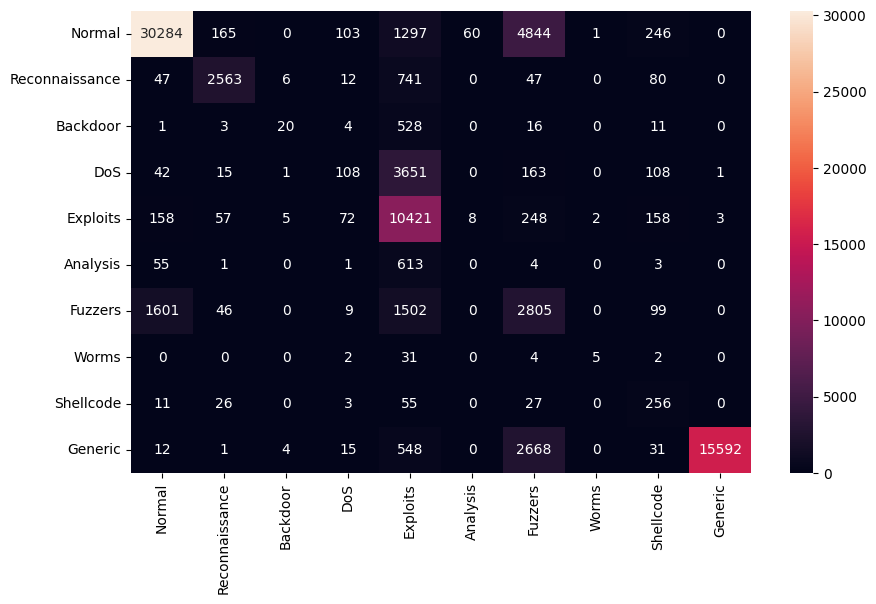

In [78]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")

In [79]:
model = Sequential()
model.add(Dense(150, input_dim=39, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 150)               6000      
                                                                 
 dense_42 (Dense)            (None, 10)                1510      
                                                                 
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


In [80]:
# training the model
model.fit(input_numerical_values, output1, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 7s 1ms/step - loss: 103.1194 - accuracy: 0.7266
Epoch 2/10
5480/5480 [==============================] - 6s 1ms/step - loss: 72.0024 - accuracy: 0.7573
Epoch 3/10
5480/5480 [==============================] - 6s 1ms/step - loss: 48.8050 - accuracy: 0.7697
Epoch 4/10
5480/5480 [==============================] - 6s 1ms/step - loss: 33.3737 - accuracy: 0.7753
Epoch 5/10
5480/5480 [==============================] - 6s 1ms/step - loss: 34.5746 - accuracy: 0.7775
Epoch 6/10
5480/5480 [==============================] - 6s 1ms/step - loss: 31.4677 - accuracy: 0.7807
Epoch 7/10
5480/5480 [==============================] - 6s 1ms/step - loss: 22.8157 - accuracy: 0.7834
Epoch 8/10
5480/5480 [==============================] - 6s 1ms/step - loss: 24.6920 - accuracy: 0.7846
Epoch 9/10
5480/5480 [==============================] - 6s 1ms/step - loss: 17.1223 - accuracy: 0.7926
Epoch 10/10
5480/5480 [==============================] - 6s 1ms/step - l

<AxesSubplot: >

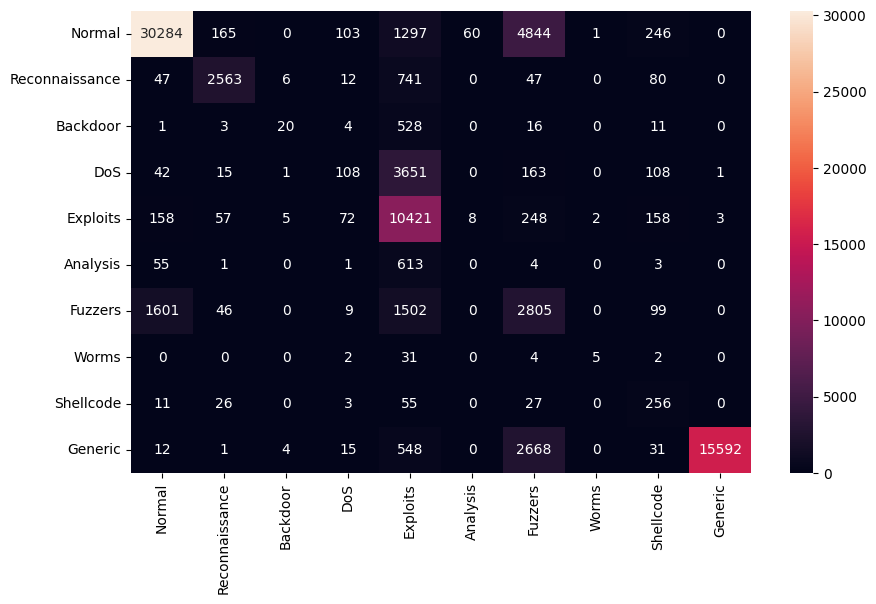

In [81]:
# confusion matrix code goes here
fig, ax = plt.subplots()
fig.set_size_inches(w=10, h=6)
_col_ord = test_output1.attack_cat.unique().tolist()

sns.heatmap(
    pd.DataFrame(confusion_matrix(
        test_output1, test_output_numerical_values, 
        labels=_col_ord
    ), columns=_col_ord, index=_col_ord), annot=True, fmt="g")